In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
start = datetime(2014, 6, 22)
end = datetime.now()

In [3]:
stock = "BTC-USD"

In [4]:
data = yf.download(stock, start, end)

C:\Users\arpit\AppData\Local\Temp\ipykernel_19060\3914557521.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


In [5]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100


In [6]:
data.tail()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2025-06-22,100987.140625,103351.632812,98286.203125,102212.031250,65536997201
2025-06-23,105577.773438,106116.859375,99705.750000,100987.476562,65237759656
2025-06-24,106045.632812,106316.828125,104740.242188,105571.515625,48822986421
2025-06-25,107361.257812,108168.398438,105881.390625,106047.406250,51624120283
2025-06-26,107165.015625,108248.320312,107165.015625,107372.070312,49814790144


In [7]:
data.describe()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
count,3936.000000,3936.000000,3936.000000,3936.000000,3.936000e+03
mean,23013.199021,23482.912287,22468.114076,22987.236734,1.973160e+10
std,26845.737993,27345.787997,26261.868206,26815.853477,2.102076e+10
min,178.102997,211.731003,171.509995,176.897003,5.914570e+06
25%,2195.682434,2303.414917,2067.512512,2190.467529,9.169897e+08
50%,9918.178711,10174.830566,9677.397949,9909.958496,1.586665e+10
75%,37298.600586,38227.264648,35917.502930,37276.667969,3.108876e+10
max,111673.281250,111970.171875,109285.070312,111679.359375,3.509679e+11


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3936 entries, 2014-09-17 to 2025-06-26
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   3936 non-null   float64
 1   (High, BTC-USD)    3936 non-null   float64
 2   (Low, BTC-USD)     3936 non-null   float64
 3   (Open, BTC-USD)    3936 non-null   float64
 4   (Volume, BTC-USD)  3936 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 184.5 KB


In [10]:
data[['Close']]

Price,Close
Ticker,BTC-USD
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2025-06-22,100987.140625
2025-06-23,105577.773438


In [11]:
closing_price = data[['Close']]

In [12]:
closing_price['Close']

Ticker,BTC-USD
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2025-06-22,100987.140625
2025-06-23,105577.773438
2025-06-24,106045.632812


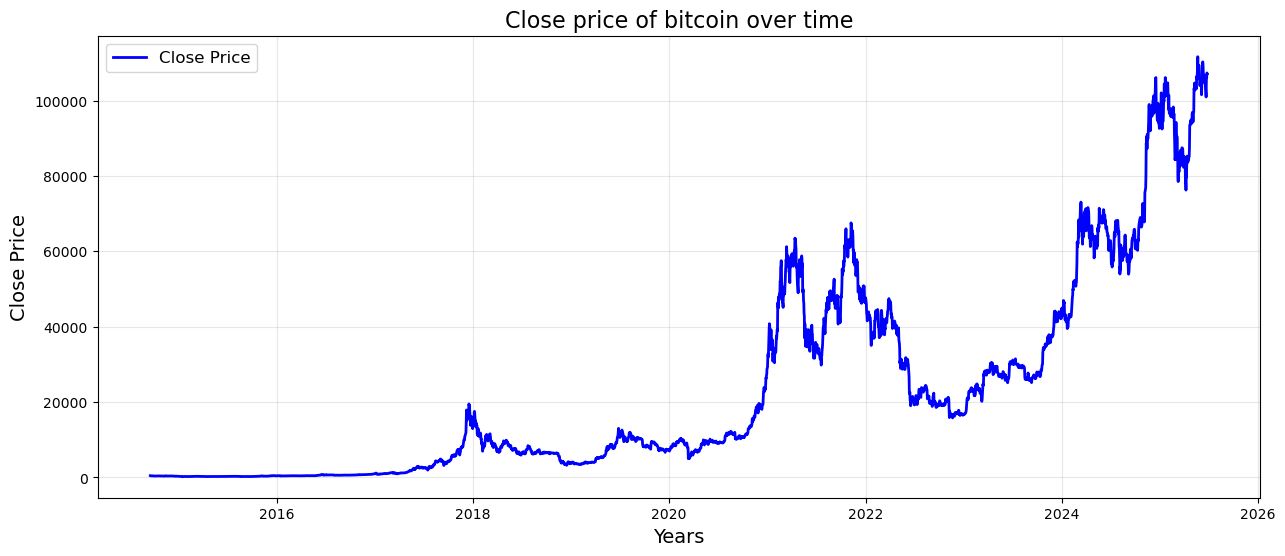

In [13]:
plt.figure(figsize = (15, 6))
plt.plot(closing_price.index, closing_price['Close'], label = 'Close Price', color = 'blue', linewidth =2)
plt.title("Close price of bitcoin over time", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [14]:
for i in range(2014, 2024):
    print(i, list(data.index.year).count(i))

2014 106
2015 365
2016 366
2017 365
2018 365
2019 365
2020 366
2021 365
2022 365
2023 365


In [15]:
closing_price['MA_365'] = closing_price['Close'].rolling(365).mean()
closing_price['MA_100'] = closing_price['Close'].rolling(100).mean()

C:\Users\arpit\AppData\Local\Temp\ipykernel_19060\1036983434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['MA_365'] = closing_price['Close'].rolling(365).mean()
C:\Users\arpit\AppData\Local\Temp\ipykernel_19060\1036983434.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['MA_100'] = closing_price['Close'].rolling(100).mean()


In [16]:
closing_price

Price,Close,MA_365,MA_100
Ticker,BTC-USD,,
Date,,,
2014-09-17,457.334015,NaN,NaN
2014-09-18,424.440002,NaN,NaN
2014-09-19,394.795990,NaN,NaN
2014-09-20,408.903992,NaN,NaN
2014-09-21,398.821014,NaN,NaN
...,...,...,...
2025-06-22,100987.140625,83048.264769,95648.384063
2025-06-23,105577.773438,83164.420869,95860.730703


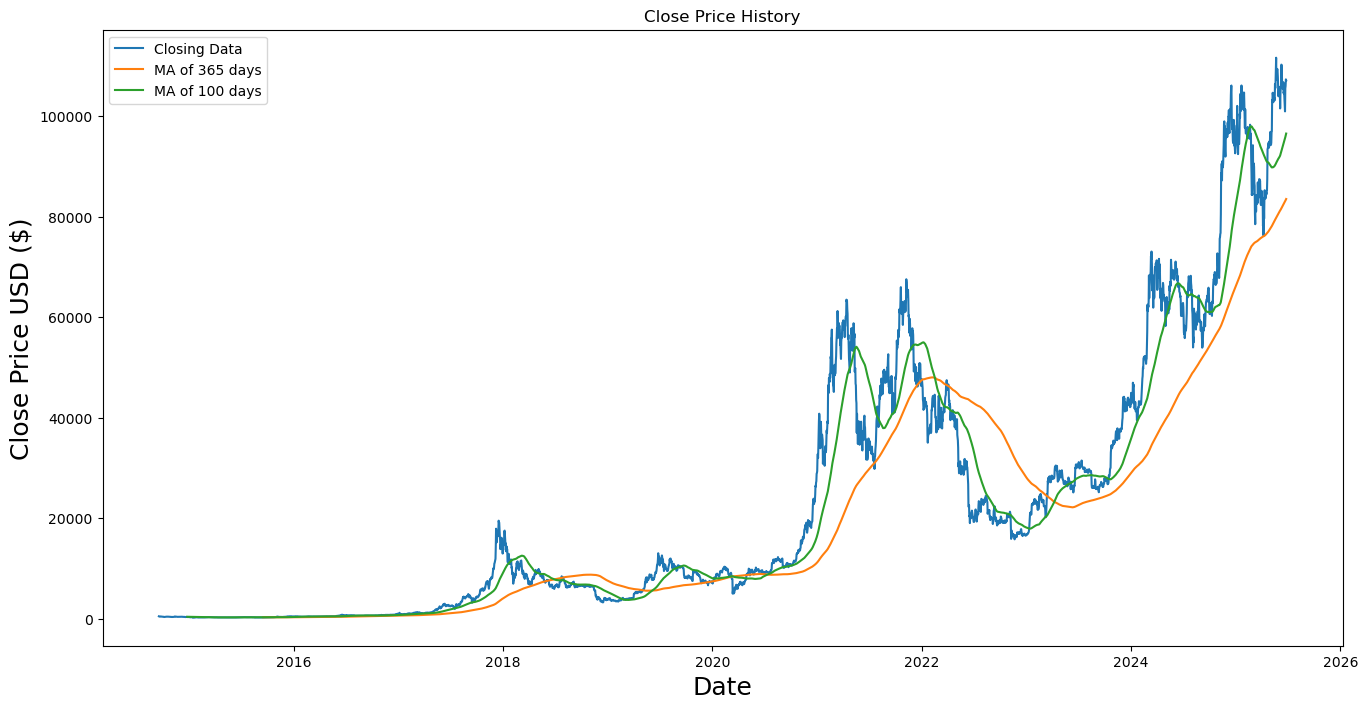

In [17]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(closing_price['Close'], label = "Closing Data")
plt.plot(closing_price['MA_365'], label = "MA of 365 days")
plt.plot(closing_price['MA_100'], label = "MA of 100 days")
plt.legend(loc='upper left')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

In [19]:
scaled_data = scaler.fit_transform(closing_price[['Close']].dropna())

In [20]:
len(scaled_data)

3936

In [21]:
x_data = []
y_data = []
base_days =100
for i in range(base_days, len(scaled_data)):
    x_data.append(scaled_data[i-base_days: i])
    y_data.append(scaled_data[i])
x_data = np.array(x_data)
y_data = np.array(y_data)

In [22]:
x_data

array([[[0.00250442],
        [0.0022094 ],
        [0.00194352],
        ...,
        [0.00140337],
        [0.0012954 ],
        [0.00126378]],

       [[0.0022094 ],
        [0.00194352],
        [0.00207005],
        ...,
        [0.0012954 ],
        [0.00126378],
        [0.00134374]],

       [[0.00194352],
        [0.00207005],
        [0.00197962],
        ...,
        [0.00126378],
        [0.00134374],
        [0.00123557]],

       ...,

       [[0.73905962],
        [0.75247724],
        [0.74030463],
        ...,
        [0.91554904],
        [0.90415603],
        [0.9453294 ]],

       [[0.75247724],
        [0.74030463],
        [0.77739795],
        ...,
        [0.90415603],
        [0.9453294 ],
        [0.94952563]],

       [[0.74030463],
        [0.77739795],
        [0.75329798],
        ...,
        [0.9453294 ],
        [0.94952563],
        [0.96132547]]])

In [23]:
y_data

array([[0.00134374],
       [0.00123557],
       [0.00124791],
       ...,
       [0.94952563],
       [0.96132547],
       [0.95956538]])

In [24]:
train_size = int(len(x_data) * 0.9)
x_train , y_train = x_data[:train_size], y_data[:train_size]
x_test, y_test = x_data[train_size:], y_data[train_size:]

In [25]:
print(f"X_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (3452, 100, 1)
y_train shape: (3452, 1)
X_test shape: (384, 100, 1)
y_test shape: (384, 1)


In [26]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

c:\Users\arpit\anaconda3\envs\tensor\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [27]:
model = Sequential()

model.add(LSTM(units=256, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(units=128, return_sequences=True))
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=32, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=10))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 256)          264192    
                                                                 
 lstm_1 (LSTM)               (None, 100, 128)          197120    
                                                                 
 lstm_2 (LSTM)               (None, 100, 64)           49408     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 25)                825       
                                                                 
 dense_1 (Dense)             (None, 10)                260       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [29]:
model.fit(x_train, y_train, batch_size=16, epochs=25)

Epoch 1/25
216/216 [==============================] - 29s 38ms/step - loss: 0.0011
Epoch 2/25
216/216 [==============================] - 7s 34ms/step - loss: 4.5547e-04
Epoch 3/25
216/216 [==============================] - 8s 37ms/step - loss: 3.5348e-04
Epoch 4/25
216/216 [==============================] - 8s 37ms/step - loss: 2.5302e-04
Epoch 5/25
216/216 [==============================] - 8s 35ms/step - loss: 2.0056e-04
Epoch 6/25
216/216 [==============================] - 8s 36ms/step - loss: 2.8288e-04
Epoch 7/25
216/216 [==============================] - 8s 36ms/step - loss: 1.4426e-04
Epoch 8/25
216/216 [==============================] - 8s 36ms/step - loss: 1.6447e-04
Epoch 9/25
216/216 [==============================] - 8s 35ms/step - loss: 1.6160e-04
Epoch 10/25
216/216 [==============================] - 8s 35ms/step - loss: 9.8999e-05
Epoch 11/25
216/216 [==============================] - 8s 35ms/step - loss: 1.1893e-04
Epoch 12/25
216/216 [==============================] - 

In [30]:
predictions = model.predict(x_test)
inv_predictions = scaler.inverse_transform(predictions)
inv_y_test = scaler.inverse_transform(y_test)

12/12 [==============================] - 2s 30ms/step


In [31]:
inv_predictions.shape

(384, 1)

In [32]:
inv_y_test.shape

(384, 1)

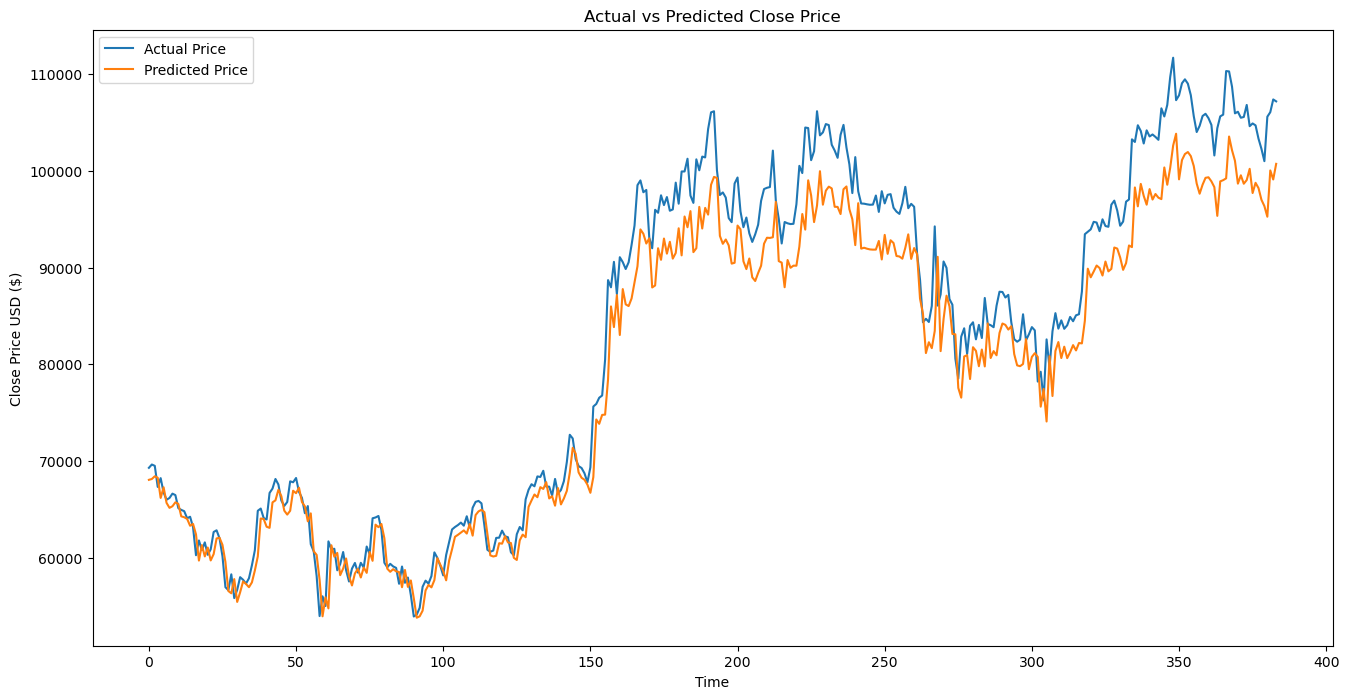

In [33]:
plt.figure(figsize=(16,8))
plt.title('Actual vs Predicted Close Price')
plt.plot(inv_y_test, label='Actual Price')
plt.plot(inv_predictions, label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Close Price USD ($)')
plt.legend()
plt.show()

In [34]:
plotting_data = pd.DataFrame(
    {
        'Original': inv_y_test.flatten(),
        'Prediction': inv_predictions.flatten(),
    }, index = closing_price.index[train_size + base_days:]
)

In [36]:
last_100  = scaled_data[-100:].reshape(1, -1, 1)
future_predictions=[]
for _ in range(10):
    next_days = model.predict(last_100)
    future_predictions.append(scaler.inverse_transform(next_days))
    last_100 = np.append(last_100[:, 1:, :], next_days.reshape(1, 1, -1), axis = 1)

1/1 [==============================] - 0s 40ms/step


In [37]:
future_predictions

[array([[99989.8]], dtype=float32),
 array([[93100.97]], dtype=float32),
 array([[88251.21]], dtype=float32),
 array([[84607.94]], dtype=float32),
 array([[81784.04]], dtype=float32),
 array([[79573.46]], dtype=float32),
 array([[77755.61]], dtype=float32),
 array([[76209.56]], dtype=float32),
 array([[74869.375]], dtype=float32),
 array([[73623.68]], dtype=float32)]

In [38]:
future_predictions = np.array(future_predictions).flatten()

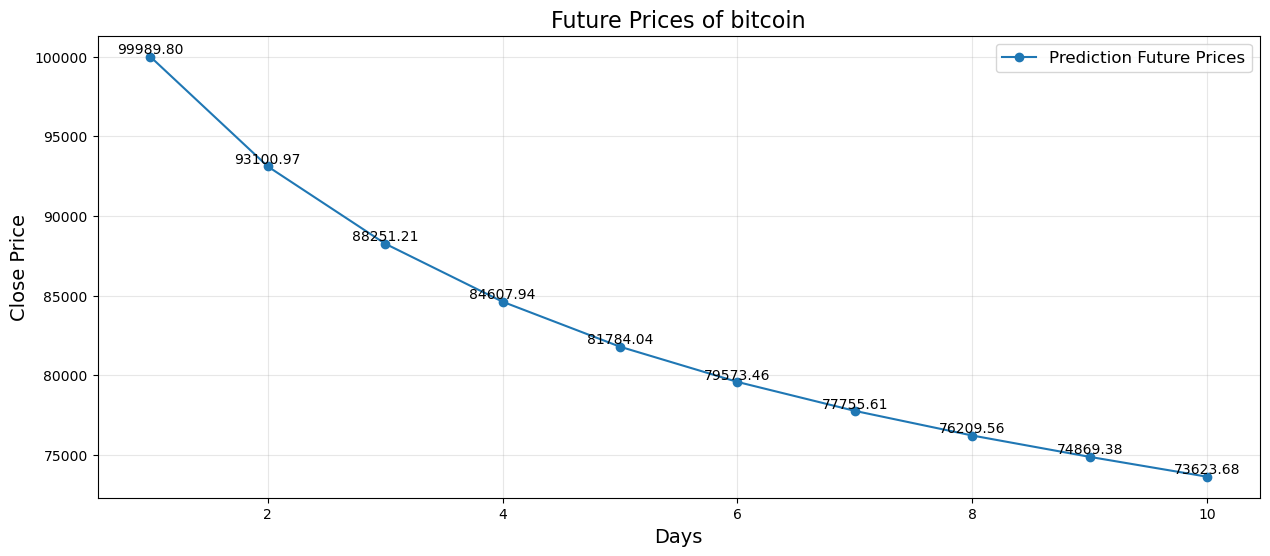

In [39]:
plt.figure(figsize = (15, 6))
plt.plot(range(1, 11), future_predictions, marker="o" ,label = 'Prediction Future Prices')

for i, val in enumerate(future_predictions):
    plt.text(i+1,val,  f'{val:.2f}', fontsize = 10, ha = 'center', va = 'bottom', color='black')

plt.title("Future Prices of bitcoin", fontsize = 16)
plt.xlabel("Days", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [40]:
model.save("model.keras")